# Summary

At this point, the data has been extracted from PDF files downloaded from the MAS website and exported to the file "master.csv".<br><br>
Proceed to do the following:
    - Clean the data
    - Add columns that will be used as features
    - Relevant exploration of the data
    - Feature Engineering
    - Extract relevant data/columns for modeling
    - Check the distribution of the modeling data

# Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
%matplotlib inline
%config IPCompleter.greedy=True
sns.set(style='darkgrid')
pd.options.display.max_columns = 999

# Load Data

In [2]:
df = pd.read_csv('../data/master.csv') # master dataset
df_company = pd.read_csv('../data/company.csv') # list of companies, prefixes and code

In [3]:
df.head()

,index,year,company,class,prem_acc_direct,prem_acc_rein_sg,prem_acc_rein_asean,prem_acc_rein_other,prem_acc_total_rein,prem_cede_rein_sg,prem_cede_rein_asean,prem_cede_rein_other,prem_cede_rein_total,prem_write_net,prem_liab_begin,prem_liab_end,prem_earned,claim_set_direct,claim_set_rein_sg,claim_set_rein_asean,claim_set_rein_other,claim_set_total_rein,claim_rcv_rein_sg,claim_rcv_rein_asean,claim_rcv_rein_other,claim_rcv_rein_total,claim_set_net,claim_liab_end,claim_liab_begin,claim_incur_net,exp_management,exp_comm_paid,exp_comm_earned,exp_comm_incur_net,exp_other,uw_gain,net_invest_income,operating_result
0,0,2007,c001,mac,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2007,c001,mahl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2007,c001,fire,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2007,c001,motor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2007,c001,wic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(16140, 38)

In [5]:
df_company.head()

,code,prefix,name
0,I855G,c001,ADVANTAGE HEALTH BENEFITS PTE LTD
1,I864G,c002,AETNA INSURANCE COMPANY LIMITED (SINGAPORE BR...
2,I877G,c003,AETNA INSURANCE (SINGAPORE) PTE. LTD.
3,I566C,c004,AIA SINGAPORE PRIVATE LIMITED
4,I823G,c005,AGR SERVICES PTE. LTD.


## Pre-processing

In [6]:
# strip spaces for all fields
df_company['code'] = [i.strip() for i in df_company['code']]
df_company['prefix'] = [i.strip() for i in df_company['prefix']]
df_company['name'] = [i.strip() for i in df_company['name']]

##### Drop 'index' column

In [7]:
df.drop(columns='index',inplace=True)

##### Drop (unwanted) rows where 'class' == 'total' | 'class' == 'misc_total

In [8]:
print(df[(df['class']=='total') | (df['class']=='misc_total')].count().values[0])
idx_list = list(df[(df['class']=='total') | (df['class']=='misc_total')].index.values)
df.drop(index=idx_list,inplace=True)

2152


In [9]:
df.shape

(13988, 37)

##### Use only rows where there is evidence of ongoing activity i.e. 'prem_liab_begin!=0'  AND  'prem_liab_end!=0'

In [10]:
df = df[(df['prem_liab_begin']!=0) & (df['prem_liab_end']!=0)].copy()
df.shape

(6420, 37)

In [11]:
# do not drop the 'year' column yet - will need it later
# will drop later when no longer required
df.reset_index(drop=True, inplace=True)

In [12]:
df.head()

,year,company,class,prem_acc_direct,prem_acc_rein_sg,prem_acc_rein_asean,prem_acc_rein_other,prem_acc_total_rein,prem_cede_rein_sg,prem_cede_rein_asean,prem_cede_rein_other,prem_cede_rein_total,prem_write_net,prem_liab_begin,prem_liab_end,prem_earned,claim_set_direct,claim_set_rein_sg,claim_set_rein_asean,claim_set_rein_other,claim_set_total_rein,claim_rcv_rein_sg,claim_rcv_rein_asean,claim_rcv_rein_other,claim_rcv_rein_total,claim_set_net,claim_liab_end,claim_liab_begin,claim_incur_net,exp_management,exp_comm_paid,exp_comm_earned,exp_comm_incur_net,exp_other,uw_gain,net_invest_income,operating_result
0,2009,c002,health,5105503,0,0,0,0,0,0,18176,18176,5087327,-122589,3656745,1307993,694266,0,0,0,0,0,0,0,0,694266,1049173,-35173,1778612,402004,601793,0,601793,0,-1474416,2170,-1472246
1,2010,c002,health,9407385,0,0,0,0,0,0,73981,73981,9333404,3279559,4357154,8255809,5121498,0,0,0,0,0,0,0,0,5121498,1948299,897771,6172026,1340434,987714,0,987714,0,-244365,14355,-230010
2,2011,c002,health,9386439,0,0,0,0,0,0,4690426,4690426,4696013,4346504,2628518,6413999,6161156,0,0,0,0,0,0,806620,806620,5354536,1739485,1961409,5132612,1432763,982201,492162,490039,0,-641415,6749,-634666
3,2012,c002,health,9560102,0,0,0,0,0,0,4827647,4827647,4732455,2483623,2164959,5051119,5892717,0,0,0,0,0,0,2789997,2789997,3102720,1281165,1646957,2736928,1128033,1050084,525043,525041,0,661117,11960,673077
4,2013,c002,health,12284004,0,0,0,0,0,0,6194945,6194945,6089059,2244439,3044172,5289326,6583877,0,0,0,0,0,0,3283009,3283009,3300868,1470513,1325221,3446160,1101279,1424087,711939,712148,0,29739,7003,36742


In [13]:
df.shape

(6420, 37)

In [14]:
df.isna().sum().any()

False

In [15]:
# check if there are cases where claim liability was 0 at both the beginning/end of period, AND claims were settled.
# this means the claims occurred and were settled within the reporting period
df[(df['claim_liab_begin']==0) & (df['claim_liab_end']==0) & (df['claim_set_net']>0)]

,year,company,class,prem_acc_direct,prem_acc_rein_sg,prem_acc_rein_asean,prem_acc_rein_other,prem_acc_total_rein,prem_cede_rein_sg,prem_cede_rein_asean,prem_cede_rein_other,prem_cede_rein_total,prem_write_net,prem_liab_begin,prem_liab_end,prem_earned,claim_set_direct,claim_set_rein_sg,claim_set_rein_asean,claim_set_rein_other,claim_set_total_rein,claim_rcv_rein_sg,claim_rcv_rein_asean,claim_rcv_rein_other,claim_rcv_rein_total,claim_set_net,claim_liab_end,claim_liab_begin,claim_incur_net,exp_management,exp_comm_paid,exp_comm_earned,exp_comm_incur_net,exp_other,uw_gain,net_invest_income,operating_result
1287,2010,c038,mahl,22819,0,0,0,0,0,0,0,0,22819,14759,14345,23233,250,0,0,0,0,0,0,0,0,250,0,0,250,6007,4292,0,4292,0,12684,1598,14282
1454,2006,c044,bonds,3710493,0,0,0,0,-4303,0,2107577,2103274,1607219,7023000,6029000,2601219,1155710,0,0,0,0,-2207,0,924147,921940,233770,0,0,233770,1233781,354246,515311,-161065,97109,1197624,1064936,2262560
1456,2007,c044,bonds,9868235,0,0,0,0,0,0,6165402,6165402,3702833,6029000,6393000,3338833,1862392,0,0,0,0,912526,0,-205237,707289,1155103,0,0,1155103,2284965,569305,1751080,-1181775,-135037,1215577,1416875,2632452
3410,2005,c088,health,10839,0,0,0,0,0,0,0,0,10839,15921,136,26624,16707,0,0,0,0,0,0,0,0,16707,0,0,16707,1187,1626,0,1626,133,6971,203,7174
4465,2008,c109,bonds,1361699,47483,0,0,47483,134435,0,9880,144315,1264867,378000,802000,840867,37399,0,0,0,0,1570,0,1544,3114,34285,0,0,34285,242265,222218,20103,202115,3006,359196,-98248,260948
5699,2006,c153,pa,0,261227,0,296,261523,0,0,0,0,261523,240000,107000,394523,0,35411,0,0,35411,0,0,0,0,35411,0,0,35411,9063,28870,0,28870,588,320591,20140,340731
5796,2005,c156,mahl,130706,0,0,0,0,3268,0,116906,120174,10532,7354,6654,11232,253355,0,0,0,0,6334,0,236887,243221,10134,0,0,10134,2758,0,5904,-5904,0,4244,359,4603


## Add columns for Policy Liability 
Add: period begin, period end, difference = end-begin

In [16]:
# insert additional columns:
# 'policy_liab_begin' : policy liability at the beginning of the valuation period
# 'policy_liab_end' : policy liability at the end of the valuation period
# 'policy_liab_diff' : policy liability difference (delta) over the course of the valuation period
# refer to MAS Guideline ID 1/04 regarding definition of Policy Liability
df['policy_liab_begin'] = df['prem_liab_begin'] + df['claim_liab_begin']
df['policy_liab_end'] = df['prem_liab_end'] + df['claim_liab_end']
df['policy_liab_diff'] = df['policy_liab_end'] - df['policy_liab_begin']

In [17]:
df.head()

,year,company,class,prem_acc_direct,prem_acc_rein_sg,prem_acc_rein_asean,prem_acc_rein_other,prem_acc_total_rein,prem_cede_rein_sg,prem_cede_rein_asean,prem_cede_rein_other,prem_cede_rein_total,prem_write_net,prem_liab_begin,prem_liab_end,prem_earned,claim_set_direct,claim_set_rein_sg,claim_set_rein_asean,claim_set_rein_other,claim_set_total_rein,claim_rcv_rein_sg,claim_rcv_rein_asean,claim_rcv_rein_other,claim_rcv_rein_total,claim_set_net,claim_liab_end,claim_liab_begin,claim_incur_net,exp_management,exp_comm_paid,exp_comm_earned,exp_comm_incur_net,exp_other,uw_gain,net_invest_income,operating_result,policy_liab_begin,policy_liab_end,policy_liab_diff
0,2009,c002,health,5105503,0,0,0,0,0,0,18176,18176,5087327,-122589,3656745,1307993,694266,0,0,0,0,0,0,0,0,694266,1049173,-35173,1778612,402004,601793,0,601793,0,-1474416,2170,-1472246,-157762,4705918,4863680
1,2010,c002,health,9407385,0,0,0,0,0,0,73981,73981,9333404,3279559,4357154,8255809,5121498,0,0,0,0,0,0,0,0,5121498,1948299,897771,6172026,1340434,987714,0,987714,0,-244365,14355,-230010,4177330,6305453,2128123
2,2011,c002,health,9386439,0,0,0,0,0,0,4690426,4690426,4696013,4346504,2628518,6413999,6161156,0,0,0,0,0,0,806620,806620,5354536,1739485,1961409,5132612,1432763,982201,492162,490039,0,-641415,6749,-634666,6307913,4368003,-1939910
3,2012,c002,health,9560102,0,0,0,0,0,0,4827647,4827647,4732455,2483623,2164959,5051119,5892717,0,0,0,0,0,0,2789997,2789997,3102720,1281165,1646957,2736928,1128033,1050084,525043,525041,0,661117,11960,673077,4130580,3446124,-684456
4,2013,c002,health,12284004,0,0,0,0,0,0,6194945,6194945,6089059,2244439,3044172,5289326,6583877,0,0,0,0,0,0,3283009,3283009,3300868,1470513,1325221,3446160,1101279,1424087,711939,712148,0,29739,7003,36742,3569660,4514685,945025


# Exploratory Data Analysis (EDA)

In [18]:
# insurance class dictionary
ins_class_dict = {'mac':'Marine and Aviation Cargo',
                  'mahl':'Marine and Aviation Hull and Liability',
                  'fire':'Fire',
                  'motor':'Motor',
                  'wic':'Work Injury Compensation',
                  'pa':'Personal Accident',
                  'health':'Health',
                  'pub_lia':'Public Liability',
                  'bonds':'Bonds',
                  'cnstr_engr':'Engineering/CAR/EAR',
                  'prof_indm':'Professional Indemnity',
                  'cpr':'Credit/Political Risk',
                  'others':'Others'}

In [19]:
class_list = list(set(df['class']))
print(class_list)

['health', 'cpr', 'pa', 'pub_lia', 'motor', 'prof_indm', 'others', 'fire', 'cnstr_engr', 'wic', 'mahl', 'bonds', 'mac']


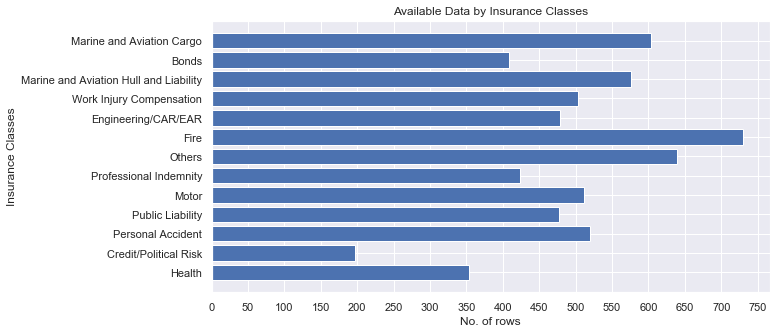

In [45]:
class_code_list = list(set(df['class']))
class_name_list = [ins_class_dict[i] for i in class_code_list]
width = [df[df['class']==i].count().values[0] for i in class_code_list]

plt.figure(figsize=(10,5))
plt.xticks(range(0,round(max(width)+50,-2),50))
plt.barh(class_name_list,width)
plt.ylabel('Insurance Classes')
plt.xlabel('No. of rows')
plt.title('Available Data by Insurance Classes')
plt.show()

Based on the count, 'cpr' (Credit/Political Risks) insurance type has the least number of rows (about 200) while 'fire' (Fire) insurance type has the most rows (about 730).

### Check Number of 'Active' Insurers Each Year Since 2005
(records available from MAS from 2005 onwards only)

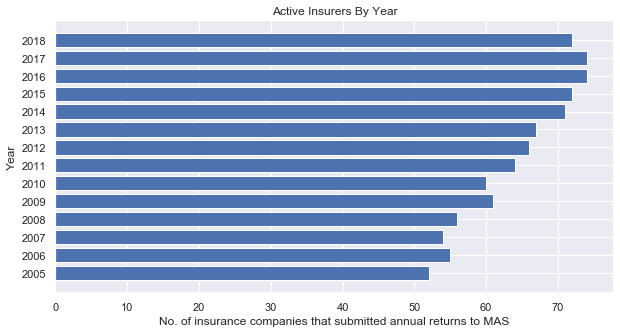

In [44]:
year_list = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
width = [len(set(df[df['year']==i]['company'])) for i in year_list]

plt.figure(figsize=(10,5))
plt.xticks(range(0,round(max(width)+50,-1),10))
plt.yticks(ticks=year_list)
plt.barh(year_list,width)
plt.ylabel('Year')
plt.xlabel('No. of insurance companies that submitted annual returns to MAS')
plt.title('Active Insurers By Year')
plt.show()

### Percentage of Negative U/W Gain for All Insurance Classes, by Year
Across all companies and insurance classes

In [31]:
year_list = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
width = [100* df[(df['uw_gain']<0) & 
                 (df['year']==i)].count().values[0] /
         df[df['year']==i].count().values[0] 
         for i in year_list]
print(math.ceil(max(width)))

45


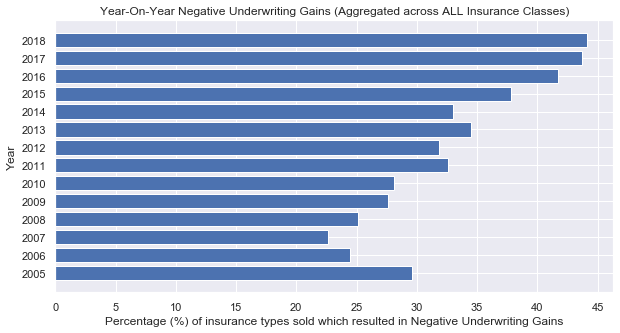

In [32]:
year_list = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
width = [100* df[(df['uw_gain']<0) & 
                 (df['year']==i)].count().values[0] /
         df[df['year']==i].count().values[0] 
         for i in year_list]

plt.figure(figsize=(10,5))
# plt.xticks(range(0,XXXXX,10))
plt.xticks(range(0,50,5))
plt.yticks(ticks=year_list)
plt.barh(year_list,width)
plt.ylabel('Year')
plt.xlabel('Percentage (%) of insurance types sold which resulted in Negative Underwriting Gains')
plt.title('Year-On-Year Negative Underwriting Gains (Aggregated across ALL Insurance Classes)')
plt.show()

### Percentage of Negative U/W Gain for Each Insurance Class, by Year
Across all companies and insurance classes

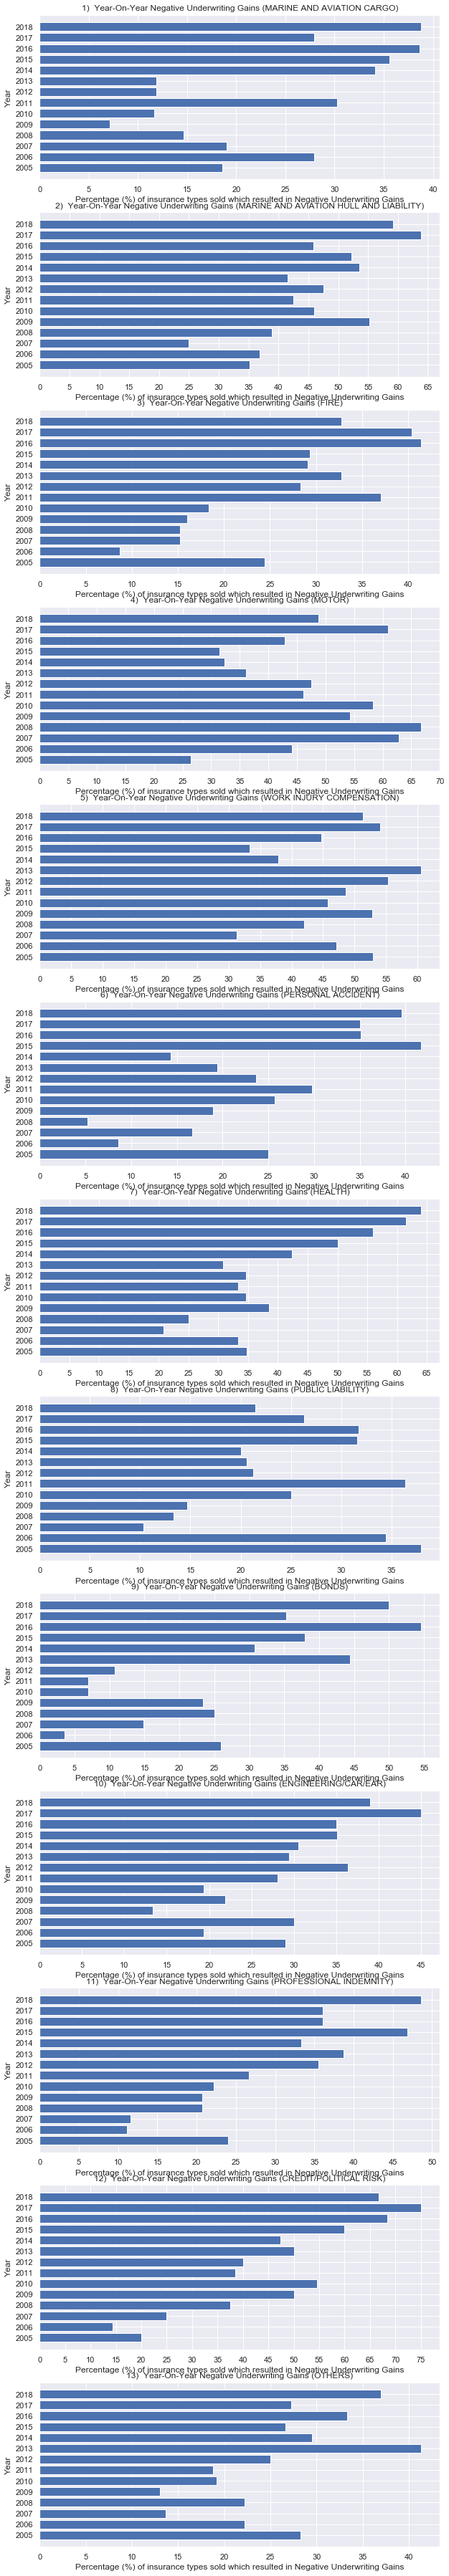

In [34]:
year_list = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
ins_class_list = list(ins_class_dict.keys())

fig, axes = plt.subplots(len(ins_class_list),figsize=(10,65),sharex=False)
for counter, c_item in enumerate(ins_class_list):
    # use list comprehension to construct width vector
    width = [100* df[(df['uw_gain']<0) & (df['class']==c_item) & 
                     (df['year']==i)].count().values[0] / 
             df[(df['year']==i) & (df['class']==c_item)].count().values[0] 
             for i in year_list]
    
    axes[counter].set_ylabel('Year')
    axes[counter].set_xlabel('Percentage (%) of insurance types sold which resulted in Negative Underwriting Gains')
    axes[counter].set_title(str(counter+1)+')  Year-On-Year Negative Underwriting Gains ('+ ins_class_dict[c_item].upper() + ')')
    axes[counter].set_xticks(range(0,100,5))
    axes[counter].set_yticks(ticks=year_list)
    axes[counter].barh(year_list,width)
    
plt.show()

In [48]:
df.head()

,year,company,class,prem_acc_direct,prem_acc_rein_sg,prem_acc_rein_asean,prem_acc_rein_other,prem_acc_total_rein,prem_cede_rein_sg,prem_cede_rein_asean,prem_cede_rein_other,prem_cede_rein_total,prem_write_net,prem_liab_begin,prem_liab_end,prem_earned,claim_set_direct,claim_set_rein_sg,claim_set_rein_asean,claim_set_rein_other,claim_set_total_rein,claim_rcv_rein_sg,claim_rcv_rein_asean,claim_rcv_rein_other,claim_rcv_rein_total,claim_set_net,claim_liab_end,claim_liab_begin,claim_incur_net,exp_management,exp_comm_paid,exp_comm_earned,exp_comm_incur_net,exp_other,uw_gain,net_invest_income,operating_result,policy_liab_begin,policy_liab_end,policy_liab_diff
0,2009,c002,health,5105503,0,0,0,0,0,0,18176,18176,5087327,-122589,3656745,1307993,694266,0,0,0,0,0,0,0,0,694266,1049173,-35173,1778612,402004,601793,0,601793,0,-1474416,2170,-1472246,-157762,4705918,4863680
1,2010,c002,health,9407385,0,0,0,0,0,0,73981,73981,9333404,3279559,4357154,8255809,5121498,0,0,0,0,0,0,0,0,5121498,1948299,897771,6172026,1340434,987714,0,987714,0,-244365,14355,-230010,4177330,6305453,2128123
2,2011,c002,health,9386439,0,0,0,0,0,0,4690426,4690426,4696013,4346504,2628518,6413999,6161156,0,0,0,0,0,0,806620,806620,5354536,1739485,1961409,5132612,1432763,982201,492162,490039,0,-641415,6749,-634666,6307913,4368003,-1939910
3,2012,c002,health,9560102,0,0,0,0,0,0,4827647,4827647,4732455,2483623,2164959,5051119,5892717,0,0,0,0,0,0,2789997,2789997,3102720,1281165,1646957,2736928,1128033,1050084,525043,525041,0,661117,11960,673077,4130580,3446124,-684456
4,2013,c002,health,12284004,0,0,0,0,0,0,6194945,6194945,6089059,2244439,3044172,5289326,6583877,0,0,0,0,0,0,3283009,3283009,3300868,1470513,1325221,3446160,1101279,1424087,711939,712148,0,29739,7003,36742,3569660,4514685,945025


# Feature Engineering

### Drop Columns Not Used

In [ ]:
df.drop(columns=['net_invest_income','operating_result'],inplace=True)

### Generate the Target:
**AUWGR(t)** = UWG(t)  /  NPW(t)<br>=== Approx. Underwriting Gain Rate
### Generate Additional Features:

(1) **LKPP(t)** = NPW(t-1) / { CSN(t-1) + [ ClaimL_end(t-1) - CLaimL_begin(t-1) ] + [ PremL_end(t-1) - PremL_begin(t-1) ] }<br>=== Last known pricing performance<br>
*which is equivalent to =>* **NPW(t-1) / [ CSN(t-1) +  PolicyLiabilityDiff(t-1) ]**<br><br>
(2) **HLR_lag1** = ( ewm[CSN(t-1)] + ewm[CL_end(t-1)] ) / ewm[NPW(t-1)]<br>=== Historical Loss Rate based on timelag1<br><br>
(3) **HLR_lag2** = ( ewm[CSN(t-2)] + ewm[CL_end(t-2)] ) / ewm[NPW(t-2)]<br>=== Historical Loss Rate based on timelag2<br><br>
(4) **HLR_lag3** = ( ewm[CSN(t-3)] + ewm[CL_end(t-3)] ) / ewm[NPW(t-3)]<br>=== Historical Loss Rate based on timelag3<br><br>
(5) **HLR_lag4** = ( ewm[CSN(t-4)] + ewm[CL_end(t-4)] ) / ewm[NPW(t-4)]<br>=== Historical Loss Rate based on timelag4<br><br>
(6) **HLR_lag5** = ( ewm[CSN(t-5)] + ewm[CL_end(t-5)] ) / ewm[NPW(t-5)]<br>=== Historical Loss Rate based on timelag5<br><br>
(7) **MER(t)** = **(-1)x alpha x**ME(t-1) / NPW(t-1)<br>=== Management Expense Rate (previous year), **alpha** is an adjustment factor for inflation etc<br><br>
(8) **DER(t)** = **(-1)x alpha x**DE(t-1) / NPW(t-1)<br>=== Distribution Expense Rate (previous year), **alpha** is an adjustment factor for inflation etc<br><br>
(9) **OER(t)** = **(-1)x alpha x**OE(t-1)] / NPW(t-1)<br>=== Other Expense Rate (previous year), **alpha** is an adjustment factor for inflation etc<br>

In [ ]:
# check for cases where NPW(t) = 0
df[df['prem_write_net']==0].count().head(1)

In [ ]:
df[df['prem_write_net']==0].head(5)

==> Zero premiums written, while Premium Liability (either begin/end) non-zero. 
Drop rows.

In [ ]:
# get the list of indexes, then drop the rows based on the corresponding index
try:
    idx_list = list(df[df['prem_write_net']==0].index.values)
except:
    pass
else:
    if len(idx_list) > 0:
        df.drop(index=idx_list,inplace=True)

In [ ]:
df.shape

In [ ]:
# Generate Target: AUWGR(t) = UWG(t) / NPW(t)
df['auwgr'] = df['uw_gain'] / df['prem_write_net']

### Time-Shifts and Exponentially Weighted Means

In [ ]:
company_list = list(df['company'].value_counts().index.values)
print(len(company_list))

In [ ]:
# Exponentially Weighted Mean - global setting for span
ewm_span = 5

In [ ]:
# define function update_nan_with_mean()
# retrieves index(es) of row(s) where the specified column is NaN, and then updates that row with the mean (skip NaN) of the column
def update_nan_with_mean(df_arg, col_name):
    try:
        idx = list(df_arg[df_arg[col_name].isna()].index.values)
    except:
        print('update_nan_with_mean(): EXCEPTION: no rows with NaN for this iteration', col_name)
    else:
        for row_num in idx:
            df_arg.loc[row_num,col_name] = df_arg[col_name].mean(skipna=True)
    return df_arg

In [ ]:
# New columns '*_lagX' will be assigned the delayed (lag by X time periods) value of their original columns
# The initial values of '*_lagX' will thus be NaN. Impute mean(*_lagX) here.
# Other relevant columns will be created too.
# create an empty dataframe of the same structure as df
df_temp = pd.DataFrame(columns = df.columns.values)

# net premiums written (historic: lag1 to lag5)
df_temp['prem_write_net_lag1'] = ''
df_temp['prem_write_net_lag2'] = ''
df_temp['prem_write_net_lag3'] = ''
df_temp['prem_write_net_lag4'] = ''
df_temp['prem_write_net_lag5'] = ''
# net claims settled (historic: lag1 to lag5)
df_temp['claim_set_net_lag1'] = ''
df_temp['claim_set_net_lag2'] = ''
df_temp['claim_set_net_lag3'] = ''
df_temp['claim_set_net_lag4'] = ''
df_temp['claim_set_net_lag5'] = ''

# premium liability @beginning and @end of period (historic: lag1)
df_temp['prem_liab_begin_lag1'] = ''
df_temp['prem_liab_end_lag1'] = ''
# claim liability @beginning of period (historic: lag1)
df_temp['claim_liab_begin_lag1'] = ''

# claim liability @end of period (historic: lag1 to lag5)
df_temp['claim_liab_end_lag1'] = ''
df_temp['claim_liab_end_lag2'] = ''
df_temp['claim_liab_end_lag3'] = ''
df_temp['claim_liab_end_lag4'] = ''
df_temp['claim_liab_end_lag5'] = ''
# policy_liability@end - policy_liability@beginning (historic: lag1)
df_temp['policy_liab_diff_lag1'] = ''
# expenses (historic: lag1)
df_temp['exp_management_lag1'] = ''
df_temp['exp_comm_incur_net_lag1'] = ''
df_temp['exp_other_lag1'] = ''
# underwriting gain/loss (historic: lag1)
df_temp['uw_gain_lag1'] = ''
# exponentially weighted means (historic: lag1 to lag5)
df_temp['ewm_prem_write_net_lag1'] = ''
df_temp['ewm_prem_write_net_lag2'] = ''
df_temp['ewm_prem_write_net_lag3'] = ''
df_temp['ewm_prem_write_net_lag4'] = ''
df_temp['ewm_prem_write_net_lag5'] = ''
df_temp['ewm_claim_set_net_lag1'] = ''
df_temp['ewm_claim_set_net_lag2'] = ''
df_temp['ewm_claim_set_net_lag3'] = ''
df_temp['ewm_claim_set_net_lag4'] = ''
df_temp['ewm_claim_set_net_lag5'] = ''
df_temp['ewm_claim_liab_end_lag1'] = ''
df_temp['ewm_claim_liab_end_lag2'] = ''
df_temp['ewm_claim_liab_end_lag3'] = ''
df_temp['ewm_claim_liab_end_lag4'] = ''
df_temp['ewm_claim_liab_end_lag5'] = ''

In [ ]:
# The following code will loop through each company
# For each company, it will loop through each class of insurance sold by that company

for company in company_list:
    # retrieve insurance classes sold by that company
    ins_class_list = list(df[df['company']==company]['class'].value_counts().index.values)
    
    # loop through each insurance class sold by that company
    for ins_class in ins_class_list:
        # create df_temp_next to be the filtered subset (company, ins_class) of df
        df_temp_next = df[(df['company']==company) & (df['class']==ins_class)].copy()
     
        # assign new column to time-delayed (1 lag) value of 'prem_write_net','policy_liab_diff_lag1','claim_set_net_lag1'
        # however, if there is only 1 row in this class, then do not assign time delayed value
        # (or else it will be assigned NaN - not what we want)
        
        ##########
        if df_temp_next.shape[0] == 1: # THERE IS ONLY 1 ROW
        ##########
            df_temp_next['prem_write_net_lag1'] = df_temp_next['prem_write_net']
            df_temp_next['prem_write_net_lag2'] = df_temp_next['prem_write_net']
            df_temp_next['prem_write_net_lag3'] = df_temp_next['prem_write_net']
            df_temp_next['prem_write_net_lag4'] = df_temp_next['prem_write_net']
            df_temp_next['prem_write_net_lag5'] = df_temp_next['prem_write_net']
            
            df_temp_next['claim_set_net_lag1'] = df_temp_next['claim_set_net']
            df_temp_next['claim_set_net_lag2'] = df_temp_next['claim_set_net']
            df_temp_next['claim_set_net_lag3'] = df_temp_next['claim_set_net']
            df_temp_next['claim_set_net_lag4'] = df_temp_next['claim_set_net']
            df_temp_next['claim_set_net_lag5'] = df_temp_next['claim_set_net']
            
            df_temp_next['claim_liab_end_lag1'] = df_temp_next['claim_liab_end']
            df_temp_next['claim_liab_end_lag2'] = df_temp_next['claim_liab_end']
            df_temp_next['claim_liab_end_lag3'] = df_temp_next['claim_liab_end']
            df_temp_next['claim_liab_end_lag4'] = df_temp_next['claim_liab_end']
            df_temp_next['claim_liab_end_lag5'] = df_temp_next['claim_liab_end']
            
            df_temp_next['policy_liab_diff_lag1'] = df_temp_next['policy_liab_diff']
            df_temp_next['exp_management_lag1'] = df_temp_next['exp_management']
            df_temp_next['exp_comm_incur_net_lag1'] = df_temp_next['exp_comm_incur_net']
            df_temp_next['exp_other_lag1'] = df_temp_next['exp_other']
            df_temp_next['prem_liab_begin_lag1'] = df_temp_next['prem_liab_begin']
            df_temp_next['prem_liab_end_lag1'] = df_temp_next['prem_liab_end']
            df_temp_next['claim_liab_begin_lag1'] = df_temp_next['claim_liab_begin']
            df_temp_next['uw_gain_lag1'] = df_temp_next['uw_gain']
            
        ##########
        elif df_temp_next.shape[0] == 2: # THERE ARE 2 ROWS
        ##########
            df_temp_next['prem_write_net_lag1'] = df_temp_next['prem_write_net'].shift(1)
            df_temp_next['prem_write_net_lag2'] = df_temp_next['prem_write_net']
            df_temp_next['prem_write_net_lag3'] = df_temp_next['prem_write_net']
            df_temp_next['prem_write_net_lag4'] = df_temp_next['prem_write_net']
            df_temp_next['prem_write_net_lag5'] = df_temp_next['prem_write_net']
            
            df_temp_next['claim_set_net_lag1'] = df_temp_next['claim_set_net'].shift(1)
            df_temp_next['claim_set_net_lag2'] = df_temp_next['claim_set_net']
            df_temp_next['claim_set_net_lag3'] = df_temp_next['claim_set_net']
            df_temp_next['claim_set_net_lag4'] = df_temp_next['claim_set_net']
            df_temp_next['claim_set_net_lag5'] = df_temp_next['claim_set_net']
            
            df_temp_next['claim_liab_end_lag1'] = df_temp_next['claim_liab_end'].shift(1)
            df_temp_next['claim_liab_end_lag2'] = df_temp_next['claim_liab_end']
            df_temp_next['claim_liab_end_lag3'] = df_temp_next['claim_liab_end']
            df_temp_next['claim_liab_end_lag4'] = df_temp_next['claim_liab_end']
            df_temp_next['claim_liab_end_lag5'] = df_temp_next['claim_liab_end']
            
            df_temp_next['policy_liab_diff_lag1'] = df_temp_next['policy_liab_diff'].shift(1)
            df_temp_next['exp_management_lag1'] = df_temp_next['exp_management'].shift(1)
            df_temp_next['exp_comm_incur_net_lag1'] = df_temp_next['exp_comm_incur_net'].shift(1)
            df_temp_next['exp_other_lag1'] = df_temp_next['exp_other'].shift(1)
            df_temp_next['prem_liab_begin_lag1'] = df_temp_next['prem_liab_begin'].shift(1)
            df_temp_next['prem_liab_end_lag1'] = df_temp_next['prem_liab_end'].shift(1)
            df_temp_next['claim_liab_begin_lag1'] = df_temp_next['claim_liab_begin'].shift(1)
            df_temp_next['uw_gain_lag1'] = df_temp_next['uw_gain'].shift(1)
        
        ##########
        elif df_temp_next.shape[0] == 3: # THERE ARE 3 ROWS
        ##########
            df_temp_next['prem_write_net_lag1'] = df_temp_next['prem_write_net'].shift(1)
            df_temp_next['prem_write_net_lag2'] = df_temp_next['prem_write_net'].shift(2)
            df_temp_next['prem_write_net_lag3'] = df_temp_next['prem_write_net']
            df_temp_next['prem_write_net_lag4'] = df_temp_next['prem_write_net']
            df_temp_next['prem_write_net_lag5'] = df_temp_next['prem_write_net']
            
            df_temp_next['claim_set_net_lag1'] = df_temp_next['claim_set_net'].shift(1)
            df_temp_next['claim_set_net_lag2'] = df_temp_next['claim_set_net'].shift(2)
            df_temp_next['claim_set_net_lag3'] = df_temp_next['claim_set_net']
            df_temp_next['claim_set_net_lag4'] = df_temp_next['claim_set_net']
            df_temp_next['claim_set_net_lag5'] = df_temp_next['claim_set_net']
            
            df_temp_next['claim_liab_end_lag1'] = df_temp_next['claim_liab_end'].shift(1)
            df_temp_next['claim_liab_end_lag2'] = df_temp_next['claim_liab_end'].shift(2)
            df_temp_next['claim_liab_end_lag3'] = df_temp_next['claim_liab_end']
            df_temp_next['claim_liab_end_lag4'] = df_temp_next['claim_liab_end']
            df_temp_next['claim_liab_end_lag5'] = df_temp_next['claim_liab_end']
            
            df_temp_next['policy_liab_diff_lag1'] = df_temp_next['policy_liab_diff'].shift(1)
            df_temp_next['exp_management_lag1'] = df_temp_next['exp_management'].shift(1)
            df_temp_next['exp_comm_incur_net_lag1'] = df_temp_next['exp_comm_incur_net'].shift(1)
            df_temp_next['exp_other_lag1'] = df_temp_next['exp_other'].shift(1)
            df_temp_next['prem_liab_begin_lag1'] = df_temp_next['prem_liab_begin'].shift(1)
            df_temp_next['prem_liab_end_lag1'] = df_temp_next['prem_liab_end'].shift(1)
            df_temp_next['claim_liab_begin_lag1'] = df_temp_next['claim_liab_begin'].shift(1)
            df_temp_next['uw_gain_lag1'] = df_temp_next['uw_gain'].shift(1)
            
        ##########
        elif df_temp_next.shape[0] == 4: # THERE ARE 4 ROWS
        ##########
            df_temp_next['prem_write_net_lag1'] = df_temp_next['prem_write_net'].shift(1)
            df_temp_next['prem_write_net_lag2'] = df_temp_next['prem_write_net'].shift(2)
            df_temp_next['prem_write_net_lag3'] = df_temp_next['prem_write_net'].shift(3)
            df_temp_next['prem_write_net_lag4'] = df_temp_next['prem_write_net']
            df_temp_next['prem_write_net_lag5'] = df_temp_next['prem_write_net']
        
            df_temp_next['claim_set_net_lag1'] = df_temp_next['claim_set_net'].shift(1)
            df_temp_next['claim_set_net_lag2'] = df_temp_next['claim_set_net'].shift(2)
            df_temp_next['claim_set_net_lag3'] = df_temp_next['claim_set_net'].shift(3)
            df_temp_next['claim_set_net_lag4'] = df_temp_next['claim_set_net']
            df_temp_next['claim_set_net_lag5'] = df_temp_next['claim_set_net']
        
            df_temp_next['claim_liab_end_lag1'] = df_temp_next['claim_liab_end'].shift(1)
            df_temp_next['claim_liab_end_lag2'] = df_temp_next['claim_liab_end'].shift(2)
            df_temp_next['claim_liab_end_lag3'] = df_temp_next['claim_liab_end'].shift(3)
            df_temp_next['claim_liab_end_lag4'] = df_temp_next['claim_liab_end']
            df_temp_next['claim_liab_end_lag5'] = df_temp_next['claim_liab_end']
            
            df_temp_next['policy_liab_diff_lag1'] = df_temp_next['policy_liab_diff'].shift(1)
            df_temp_next['exp_management_lag1'] = df_temp_next['exp_management'].shift(1)
            df_temp_next['exp_comm_incur_net_lag1'] = df_temp_next['exp_comm_incur_net'].shift(1)
            df_temp_next['exp_other_lag1'] = df_temp_next['exp_other'].shift(1)
            df_temp_next['prem_liab_begin_lag1'] = df_temp_next['prem_liab_begin'].shift(1)
            df_temp_next['prem_liab_end_lag1'] = df_temp_next['prem_liab_end'].shift(1)
            df_temp_next['claim_liab_begin_lag1'] = df_temp_next['claim_liab_begin'].shift(1)
            df_temp_next['uw_gain_lag1'] = df_temp_next['uw_gain'].shift(1)
        
        ##########
        elif df_temp_next.shape[0] == 5: # THERE ARE 5 ROWS
        ##########
            df_temp_next['prem_write_net_lag1'] = df_temp_next['prem_write_net'].shift(1)
            df_temp_next['prem_write_net_lag2'] = df_temp_next['prem_write_net'].shift(2)
            df_temp_next['prem_write_net_lag3'] = df_temp_next['prem_write_net'].shift(3)
            df_temp_next['prem_write_net_lag4'] = df_temp_next['prem_write_net'].shift(4)
            df_temp_next['prem_write_net_lag5'] = df_temp_next['prem_write_net']
    
            df_temp_next['claim_set_net_lag1'] = df_temp_next['claim_set_net'].shift(1)
            df_temp_next['claim_set_net_lag2'] = df_temp_next['claim_set_net'].shift(2)
            df_temp_next['claim_set_net_lag3'] = df_temp_next['claim_set_net'].shift(3)
            df_temp_next['claim_set_net_lag4'] = df_temp_next['claim_set_net'].shift(4)
            df_temp_next['claim_set_net_lag5'] = df_temp_next['claim_set_net']
    
            df_temp_next['claim_liab_end_lag1'] = df_temp_next['claim_liab_end'].shift(1)
            df_temp_next['claim_liab_end_lag2'] = df_temp_next['claim_liab_end'].shift(2)
            df_temp_next['claim_liab_end_lag3'] = df_temp_next['claim_liab_end'].shift(3)
            df_temp_next['claim_liab_end_lag4'] = df_temp_next['claim_liab_end'].shift(4)
            df_temp_next['claim_liab_end_lag5'] = df_temp_next['claim_liab_end']
            
            df_temp_next['policy_liab_diff_lag1'] = df_temp_next['policy_liab_diff'].shift(1)
            df_temp_next['exp_management_lag1'] = df_temp_next['exp_management'].shift(1)
            df_temp_next['exp_comm_incur_net_lag1'] = df_temp_next['exp_comm_incur_net'].shift(1)
            df_temp_next['exp_other_lag1'] = df_temp_next['exp_other'].shift(1)
            df_temp_next['prem_liab_begin_lag1'] = df_temp_next['prem_liab_begin'].shift(1)
            df_temp_next['prem_liab_end_lag1'] = df_temp_next['prem_liab_end'].shift(1)
            df_temp_next['claim_liab_begin_lag1'] = df_temp_next['claim_liab_begin'].shift(1)
            df_temp_next['uw_gain_lag1'] = df_temp_next['uw_gain'].shift(1)
            
        else: # THERE ARE AT LEAST 6 ROWS
            
            # assign time delayed (lag X) value
            df_temp_next['prem_write_net_lag1'] = df_temp_next['prem_write_net'].shift(1)
            df_temp_next['prem_write_net_lag2'] = df_temp_next['prem_write_net'].shift(2)
            df_temp_next['prem_write_net_lag3'] = df_temp_next['prem_write_net'].shift(3)
            df_temp_next['prem_write_net_lag4'] = df_temp_next['prem_write_net'].shift(4)
            df_temp_next['prem_write_net_lag5'] = df_temp_next['prem_write_net'].shift(5)
            
            df_temp_next['claim_set_net_lag1'] = df_temp_next['claim_set_net'].shift(1)
            df_temp_next['claim_set_net_lag2'] = df_temp_next['claim_set_net'].shift(2)
            df_temp_next['claim_set_net_lag3'] = df_temp_next['claim_set_net'].shift(3)
            df_temp_next['claim_set_net_lag4'] = df_temp_next['claim_set_net'].shift(4)
            df_temp_next['claim_set_net_lag5'] = df_temp_next['claim_set_net'].shift(5)
            
            df_temp_next['claim_liab_end_lag1'] = df_temp_next['claim_liab_end'].shift(1)
            df_temp_next['claim_liab_end_lag2'] = df_temp_next['claim_liab_end'].shift(2)
            df_temp_next['claim_liab_end_lag3'] = df_temp_next['claim_liab_end'].shift(3)
            df_temp_next['claim_liab_end_lag4'] = df_temp_next['claim_liab_end'].shift(4)
            df_temp_next['claim_liab_end_lag5'] = df_temp_next['claim_liab_end'].shift(5)
        
            df_temp_next['policy_liab_diff_lag1'] = df_temp_next['policy_liab_diff'].shift(1)
            df_temp_next['exp_management_lag1'] = df_temp_next['exp_management'].shift(1)
            df_temp_next['exp_comm_incur_net_lag1'] = df_temp_next['exp_comm_incur_net'].shift(1)
            df_temp_next['exp_other_lag1'] = df_temp_next['exp_other'].shift(1)
            df_temp_next['prem_liab_begin_lag1'] = df_temp_next['prem_liab_begin'].shift(1)
            df_temp_next['prem_liab_end_lag1'] = df_temp_next['prem_liab_end'].shift(1)
            df_temp_next['claim_liab_begin_lag1'] = df_temp_next['claim_liab_begin'].shift(1)
            df_temp_next['uw_gain_lag1'] = df_temp_next['uw_gain'].shift(1)
        
        # for the row where specified column value = NaN, impute mean_value of column
        df_temp_next = update_nan_with_mean(df_temp_next, 'prem_write_net_lag1')
        df_temp_next = update_nan_with_mean(df_temp_next, 'prem_write_net_lag2')
        df_temp_next = update_nan_with_mean(df_temp_next, 'prem_write_net_lag3')
        df_temp_next = update_nan_with_mean(df_temp_next, 'prem_write_net_lag4')
        df_temp_next = update_nan_with_mean(df_temp_next, 'prem_write_net_lag5')
        df_temp_next = update_nan_with_mean(df_temp_next, 'claim_set_net_lag1')
        df_temp_next = update_nan_with_mean(df_temp_next, 'claim_set_net_lag2')
        df_temp_next = update_nan_with_mean(df_temp_next, 'claim_set_net_lag3')
        df_temp_next = update_nan_with_mean(df_temp_next, 'claim_set_net_lag4')
        df_temp_next = update_nan_with_mean(df_temp_next, 'claim_set_net_lag5')
        df_temp_next = update_nan_with_mean(df_temp_next, 'claim_liab_end_lag1')
        df_temp_next = update_nan_with_mean(df_temp_next, 'claim_liab_end_lag2')
        df_temp_next = update_nan_with_mean(df_temp_next, 'claim_liab_end_lag3')
        df_temp_next = update_nan_with_mean(df_temp_next, 'claim_liab_end_lag4')
        df_temp_next = update_nan_with_mean(df_temp_next, 'claim_liab_end_lag5')
        df_temp_next = update_nan_with_mean(df_temp_next, 'policy_liab_diff_lag1')
        df_temp_next = update_nan_with_mean(df_temp_next, 'exp_management_lag1')
        df_temp_next = update_nan_with_mean(df_temp_next, 'exp_comm_incur_net_lag1')
        df_temp_next = update_nan_with_mean(df_temp_next, 'exp_other_lag1')
        df_temp_next = update_nan_with_mean(df_temp_next, 'prem_liab_begin_lag1')
        df_temp_next = update_nan_with_mean(df_temp_next, 'prem_liab_end_lag1')
        df_temp_next = update_nan_with_mean(df_temp_next, 'claim_liab_begin_lag1')
        df_temp_next = update_nan_with_mean(df_temp_next, 'uw_gain_lag1')
        
        # compute relevant Exponentially Weighted Means (EWM with ewm_span)
        df_temp_next['ewm_prem_write_net_lag1'] = df_temp_next['prem_write_net_lag1'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_prem_write_net_lag2'] = df_temp_next['prem_write_net_lag2'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_prem_write_net_lag3'] = df_temp_next['prem_write_net_lag3'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_prem_write_net_lag4'] = df_temp_next['prem_write_net_lag4'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_prem_write_net_lag5'] = df_temp_next['prem_write_net_lag5'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_claim_set_net_lag1'] = df_temp_next['claim_set_net_lag1'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_claim_set_net_lag2'] = df_temp_next['claim_set_net_lag2'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_claim_set_net_lag3'] = df_temp_next['claim_set_net_lag3'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_claim_set_net_lag4'] = df_temp_next['claim_set_net_lag4'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_claim_set_net_lag5'] = df_temp_next['claim_set_net_lag5'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_claim_liab_end_lag1'] = df_temp_next['claim_liab_end_lag1'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_claim_liab_end_lag2'] = df_temp_next['claim_liab_end_lag2'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_claim_liab_end_lag3'] = df_temp_next['claim_liab_end_lag3'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_claim_liab_end_lag4'] = df_temp_next['claim_liab_end_lag4'].ewm(span=ewm_span).mean()
        df_temp_next['ewm_claim_liab_end_lag5'] = df_temp_next['claim_liab_end_lag5'].ewm(span=ewm_span).mean()
        
        # concatenate df_temp_next to df_temp
        df_temp = pd.concat([df_temp, df_temp_next],ignore_index=True, sort=False)

# after looping all company, ins_class, df_temp is completed
# assign df as a copy of df_temp (make a copy, in case we make changes to df_temp later)
df = df_temp.copy()

In [ ]:
df.shape

### Check Denominators

Before generating the remaining ratios, check the denominators first. Denominators where value = 0 will result in ratios => Inf/NaN and thus need to be removed. 

In [ ]:
print(df[df['claim_set_net_lag1'].isna()].count().any(),end=' ')
print(df[df['ewm_prem_write_net_lag1'].isna()].count().any(),end=' ')
print(df[df['ewm_prem_write_net_lag1']==0].count().values[0],end=' ')
print(df[df['ewm_prem_write_net_lag1']==0].count().any(),end=' ')
print(df[df['ewm_prem_write_net_lag2']==0].count().any(),end=' ')
print(df[df['ewm_prem_write_net_lag3']==0].count().any(),end=' ')
print(df[df['ewm_prem_write_net_lag4']==0].count().any(),end=' ')
print(df[df['ewm_prem_write_net_lag5']==0].count().any(),end=' ')
print(df[df['prem_write_net_lag1']==0].count().values[0],end=' ')
print(df[df['prem_write_net_lag2']==0].count().values[0],end=' ')
print(df[df['prem_write_net_lag3']==0].count().values[0],end=' ')
print(df[df['prem_write_net_lag4']==0].count().values[0],end=' ')
print(df[df['prem_write_net_lag5']==0].count().values[0])

In [ ]:
print(df[df['prem_write_net_lag1'].isna()].count().values[0],end=' ')
print(df[df['prem_write_net_lag2'].isna()].count().values[0],end=' ')
print(df[df['prem_write_net_lag3'].isna()].count().values[0],end=' ')
print(df[df['prem_write_net_lag4'].isna()].count().values[0],end=' ')
print(df[df['prem_write_net_lag5'].isna()].count().values[0],end=' ')
print(df[df['claim_set_net_lag1'].isna()].count().values[0],end=' ')
print(df[df['claim_set_net_lag2'].isna()].count().values[0],end=' ')
print(df[df['claim_set_net_lag3'].isna()].count().values[0],end=' ')
print(df[df['claim_set_net_lag4'].isna()].count().values[0],end=' ')
print(df[df['claim_set_net_lag5'].isna()].count().values[0],end=' ')
print(df[df['claim_liab_end_lag1'].isna()].count().values[0],end=' ')
print(df[df['claim_liab_end_lag2'].isna()].count().values[0],end=' ')
print(df[df['claim_liab_end_lag3'].isna()].count().values[0],end=' ')
print(df[df['claim_liab_end_lag4'].isna()].count().values[0],end=' ')
print(df[df['claim_liab_end_lag5'].isna()].count().values[0],end=' ')

In [ ]:
print(df[(df['prem_write_net_lag1'].isna()) & 
         (df['claim_set_net_lag1'].isna()) & (df['claim_liab_end_lag1'].isna())].count().values[0],end=' ')
print(df[(df['prem_write_net_lag2'].isna()) & 
         (df['claim_set_net_lag2'].isna()) & (df['claim_liab_end_lag2'].isna())].count().values[0],end=' ')
print(df[(df['prem_write_net_lag3'].isna()) & 
         (df['claim_set_net_lag3'].isna()) & (df['claim_liab_end_lag3'].isna())].count().values[0],end=' ')
print(df[(df['prem_write_net_lag4'].isna()) & 
         (df['claim_set_net_lag4'].isna()) & (df['claim_liab_end_lag4'].isna())].count().values[0],end=' ')
print(df[(df['prem_write_net_lag5'].isna()) & 
         (df['claim_set_net_lag5'].isna()) & (df['claim_liab_end_lag5'].isna())].count().values[0],end=' ')

In [ ]:
# define alpha
alpha = 1.05
# generate remaining features
df['lkpp'] = df['prem_write_net_lag1'] / (df['claim_set_net_lag1'] + df['policy_liab_diff_lag1'])
df['hlr_lag1'] = (df['ewm_claim_set_net_lag1'] + df['ewm_claim_liab_end_lag1']) / df['ewm_prem_write_net_lag1']
df['hlr_lag2'] = (df['ewm_claim_set_net_lag2'] + df['ewm_claim_liab_end_lag2']) / df['ewm_prem_write_net_lag2']
df['hlr_lag3'] = (df['ewm_claim_set_net_lag3'] + df['ewm_claim_liab_end_lag3']) / df['ewm_prem_write_net_lag3']
df['hlr_lag4'] = (df['ewm_claim_set_net_lag4'] + df['ewm_claim_liab_end_lag4']) / df['ewm_prem_write_net_lag4']
df['hlr_lag5'] = (df['ewm_claim_set_net_lag5'] + df['ewm_claim_liab_end_lag5']) / df['ewm_prem_write_net_lag5']
df['prem_liab_diff_lag1'] = df['prem_liab_end_lag1'] - df['prem_liab_begin_lag1']
df['claim_liab_diff_lag1'] = df['claim_liab_end_lag1'] - df['claim_liab_begin_lag1']

#debug
# df['mer'] = -1*alpha*df['exp_management_lag1'] / df['prem_write_net_lag1'] # multiply by -1 (negative polarity)
# df['der'] = -1*alpha*df['exp_comm_incur_net_lag1'] / df['prem_write_net_lag1'] # multiply by -1 (negative polarity)
# df['oer'] = -1*alpha*df['exp_other_lag1'] / df['prem_write_net_lag1'] # multiply by -1 (negative polarity)
df['mer'] = 1*alpha*df['exp_management_lag1'] / df['prem_write_net_lag1'] # multiply by -1 (negative polarity)
df['der'] = 1*alpha*df['exp_comm_incur_net_lag1'] / df['prem_write_net_lag1'] # multiply by -1 (negative polarity)
df['oer'] = 1*alpha*df['exp_other_lag1'] / df['prem_write_net_lag1'] # multiply by -1 (negative polarity)

In [ ]:
# SANITY CHECK
print(df[df['prem_liab_diff_lag1']==0].count().values[0])
print(df[df['claim_liab_diff_lag1']==0].count().values[0])
print(df[df['uw_gain_lag1']==0].count().values[0])
print('---')
print(df[df['prem_liab_diff_lag1'].isna()].count().values[0])
print(df[df['claim_liab_diff_lag1'].isna()].count().values[0])
print(df[df['uw_gain_lag1'].isna()].count().values[0])

In [ ]:
# change all fields (except 'class' and 'company') to numeric
columns_to_convert = list(df.columns.values)
columns_to_convert.pop(0) # remove 'year'
columns_to_convert.pop(0) # remove 'company'
columns_to_convert.pop(0) # remove 'class'
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col])

In [ ]:
df.describe()

In [ ]:
# LKPP(t) = NPW(t-1) / [ CSN(t-1) +  PolicyLiability(t-1) ]
df[(df['lkpp'].isna()) | (df['lkpp']==float("inf"))]

=> In the above 4 records, the Policy Liabiity in the prior time period is zero, and the Net Claims Settled is also zero. As a result, these 4 records cannot be used for calculation the Last Known Pricing Performance (LPKK). Drop these 4 rows.

In [ ]:
# get the list of indexes, then drop the rows based on the corresponding index
try:
    idx_list = list(df[(df['lkpp'].isna()) | (df['lkpp']==float("inf"))].index.values)
except:
    pass
else:
    if len(idx_list) > 0:
        df.drop(index=idx_list,inplace=True)

In [ ]:
# check num rows where expenses are >= 0
print(df[df['mer']>=0].count().values[0])
print(df[df['der']>=0].count().values[0])
print(df[df['oer']>=0].count().values[0])

### Assign Polarity to Features

**The following features represent monies and/or ratio of monies that are OUTGOING.**<br>
**Therefore, these should be assigned -ve sign.**<br>
- hlr_lag1
- hlr_lag2
- hlr_lag3
- hlr_lag4
- hlr_lag5
- mer
- der
- oer
- claim_set_net_lag1
- exp_management_lag1
- exp_com_incur_net_lag1
- exp_other_lag1
- prem_liab_diff_lag1
- claim_liab_diff_lag1<br><br>
**Notes regarding features not listed above:-**<br><br>
- **lkpp** = NPW(t-1) / [ CSN(t-1) + PolicyLiabilityDiff(t-1) ]; this can be Negative if business intake shrinks significantly over the year i.e. PolicyLiabilityDiff is -ve and |PolicyLiabilityDiff| > CSN(t-1)
- **prem_write_net_lag1** is INCOMING money and hence POSITIVE
- **uw_gain_lag1** is the performance for the previous year and must not be modified 

In [ ]:
def make_columns_negative(df_arg, col_list):
    for i in col_list:
        df_arg[i] = -1 * df_arg[i]
    return df_arg.copy()

In [ ]:
# change signs to negative
columns_to_change = ['hlr_lag1','hlr_lag2','hlr_lag3','hlr_lag4','hlr_lag5',
                     'mer','der','oer','claim_set_net_lag1','exp_management_lag1',
                     'exp_comm_incur_net_lag1','exp_other_lag1','prem_liab_diff_lag1',
                     'claim_liab_diff_lag1']

df = make_columns_negative(df, columns_to_change)

In [ ]:
df.shape

In [ ]:
df.head()

# Put Modeling Features into Dataframe

### Create df_model using only those columns to be used for modelling

In [ ]:
# generate df_model, which is a subset of df
df_model = df[['year','company','class','auwgr','lkpp','hlr_lag1','hlr_lag2','hlr_lag3','hlr_lag4','hlr_lag5','mer',
               'der','oer','prem_write_net_lag1','claim_set_net_lag1','exp_management_lag1','exp_comm_incur_net_lag1',
               'exp_other_lag1','prem_liab_diff_lag1','claim_liab_diff_lag1','uw_gain_lag1']]
df_model.shape

### Get Dummies (based on 'class' column)

In [ ]:
df_model = pd.get_dummies(df_model,columns=['class'])
df_model.shape

In [ ]:
df_model.describe()

# Export Untrimmed Data

In [ ]:
# export the data before checking their distributions and removing outliers
df_model.to_csv('../data/df_model_untrimmed.csv',index=False)

# Check Distribution of Data

## Target: auwgr

In [ ]:
# no limits to range
print('mean:',df_model['auwgr'].mean())
fig, axes = plt.subplots(1,2,figsize=(14,4))
axes[0].hist(df_model['auwgr'],bins=100)
axes[1].boxplot(df_model['auwgr'])
plt.show();

In [ ]:
# limited to range (-4,4)
print('mean:',df_model['auwgr'].mean())
fig, axes = plt.subplots(1,2,figsize=(14,4))
axes[0].hist(df_model['auwgr'],range=(-4,4),bins=100,density=False)
axes[1].boxplot(df_model['auwgr'])
axes[1].set_ylim([-4,4])
plt.show();

In [ ]:
# check how many rows of data we have if we limit our target to (-4,4)
df_model[(df_model['auwgr'] < 4) & (df_model['auwgr'] > -4)].count().values[0]

In [ ]:
df_model_trimmed = df_model[(df_model['auwgr'] < 4) & (df_model['auwgr'] > -4)].copy()

In [ ]:
df_model_trimmed.describe()

In [ ]:
# no limits to range
print('mean:',df_model_trimmed['auwgr'].mean())
fig, axes = plt.subplots(1,2,figsize=(14,4))
axes[0].hist(df_model_trimmed['auwgr'],bins=100)
axes[1].boxplot(df_model_trimmed['auwgr'])
plt.show();

## Define Functions

In [ ]:
# functions to be used for plotting

def plot_features_stats(df_arg, features, target):
    for i in features:
        x=df_arg[i]
        y=df_arg[target]
        fig, axes = plt.subplots(1,3,figsize=(14,4))
        axes[0].hist(x,bins=100)
        axes[0].set_title(i+' :  mean = '+str(x.mean()))
        axes[1].boxplot(x)
        axes[2].scatter(x,y)
        axes[2].set_xlabel('Feature Value')
        axes[2].set_ylabel('Target Value')

def plot_feature_with_limits(df_arg, col_name, min_arg, max_arg, bins_arg=100):
    x=df_arg[col_name]
    fig, axes = plt.subplots(1,2,figsize=(14,4))
    axes[0].hist(x,bins=bins_arg,range=(min_arg,max_arg),density=False)
    axes[0].set_title(col_name+' :  mean = '+str(x.mean()))
    axes[1].boxplot(x)
    axes[1].set_ylim([min_arg,max_arg])
    plt.show();
    print('no. of rows within limits',df_arg[(df_arg[col_name]>min_arg) & (df_arg[col_name]<max_arg)].count().values[0])
    return None

def trim_df(df_arg, col_name, min_arg, max_arg):
    return df_arg[(df_arg[col_name] > min_arg) & (df_arg[col_name] < max_arg)].copy()

## Plot All Features

In [ ]:
features_list = list(df_model_trimmed.columns.values)

In [ ]:
features_list.pop(0) # remove year
features_list.pop(0) # remove company
features_list.pop(0) # remove auwgr

In [ ]:
# remove 'class' dummies (12 columns, at the end of the df)
features_list.pop()
features_list.pop()
features_list.pop()
features_list.pop()
features_list.pop()
features_list.pop()
features_list.pop()
features_list.pop()
features_list.pop()
features_list.pop()
features_list.pop()
features_list.pop()
features_list.pop()
print(features_list)

In [ ]:
plot_features_stats(df_model_trimmed, features_list, 'auwgr')

## Further Feature Engineering
For each feature, some of the extreme outliers are removed by specifying max/min limits and then trimming the data that do not fall within these limits.

### lkpp

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'lkpp', -20 , 11)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'lkpp', -20 , 11)
df_model_trimmed.shape

### hlr_lag1

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'hlr_lag1', -9 , 2)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'hlr_lag1', -9,2)
df_model_trimmed.shape

### hlr_lag2

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'hlr_lag2', -9 , 2)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'hlr_lag2', -9 , 2)
df_model_trimmed.shape

### hlr_lag3

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'hlr_lag3', -9 , 2)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'hlr_lag3', -9 , 2)
df_model_trimmed.shape

### hlr_lag4

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'hlr_lag4', -9 , 2)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'hlr_lag4', -9 , 2)
df_model_trimmed.shape

### hlr_lag5

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'hlr_lag5', -9 , 2)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'hlr_lag5', -9 , 2)
df_model_trimmed.shape

### mer

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'mer', -2 , 0.1)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'mer', -2 , 0.1)
df_model_trimmed.shape

### der

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'der', -1 , 1.2)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'der', -1 , 1.2)
df_model_trimmed.shape

### oer

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'oer', -0.3 , 0.2)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'oer', -0.3 , 0.2)
df_model_trimmed.shape

### prem_write_net_lag1

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'prem_write_net_lag1', 0 ,  40_000_000)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'prem_write_net_lag1', 0  ,  40_000_000)
df_model_trimmed.shape

### claim_set_net_lag1

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'claim_set_net_lag1', -20_000_000 ,  10_000)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'claim_set_net_lag1', -20_000_000 ,  10_000)
df_model_trimmed.shape

### exp_management_lag1

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'exp_management_lag1', -10_000_000  ,  10)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'exp_management_lag1', -10_000_000  ,  10)
df_model_trimmed.shape

### exp_comm_incur_net_lag1

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'exp_comm_incur_net_lag1', -5_000_000  ,  5_000_000)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'exp_comm_incur_net_lag1', -5_000_000  ,  5_000_000)
df_model_trimmed.shape

### exp_other_lag1

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'exp_other_lag1', -1_000_000  ,  10_000)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'exp_other_lag1', -1_000_000  ,  10_000)
df_model_trimmed.shape

### prem_liab_diff_lag1

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'prem_liab_diff_lag1', -2_500_000  ,  2_500_000)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'prem_liab_diff_lag1', -2_500_000  ,  2_500_000)
df_model_trimmed.shape

### claim_liab_diff_lag1

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'claim_liab_diff_lag1', -6_000_000  ,  6_000_000)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'claim_liab_diff_lag1', -6_000_000  ,  6_000_000)
df_model_trimmed.shape

### uw_gain_lag1

In [ ]:
# plot distribution within limits
plot_feature_with_limits(df_model_trimmed, 'uw_gain_lag1', -10_000_000  ,  10_000_000)

In [ ]:
df_model_trimmed = trim_df(df_model_trimmed,'uw_gain_lag1', -10_000_000  ,  10_000_000)
df_model_trimmed.shape

# Export Trimmed Data

In [ ]:
df_model_trimmed.to_csv('../data/df_model_trimmed.csv',index=False)

# Plot Features After Trimming (less dummies)

### Drop 'class' dummies

In [ ]:
# # remove the 'class' dummies
droplist = ['class_bonds','class_cnstr_engr','class_cpr','class_fire','class_health',
            'class_mac','class_mahl','class_motor','class_others','class_pa',
            'class_prof_indm','class_pub_lia','class_wic']
df_model_trimmed.drop(columns=droplist,inplace=True)
df_model_trimmed.shape

### Plot Features (less dummies)

In [ ]:
plot_features_stats(df_model_trimmed, features_list, 'auwgr')

# Summary of Data Distribution

After trimming the extreme outliers of all features, we are left with a dataset comprising 4347 rows. From the above plots, there does not appear to be a clear relationship between the features and the target. Therefore, it may be a challenge to carry out regressions and classifications with this data.